In [1]:
import requests
import lxml.html as lh
import pandas as pd

In [2]:
url='https://www.mzcr.cz/dokumenty/koronavirus-2019-ncov-aktualni-data_18455_1.html'
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')

In [3]:
[len(T) for T in tr_elements[:12]]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [4]:
col=[]
i=0#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"
			Datum hlášení
			"
2:"
			Celkový počet testovaných s podezřením na COVID-19
			"
3:"
			Z toho počet laboratorně NEGATIVNÍCH případů
			"
4:"
			Z toho počet laboratorně POZITIVNÍCH případů
			"


In [5]:
for j in range(1,len(tr_elements)):
    T = tr_elements[j]
    #looking for my table with 4 cols 
    if len(T)==4:    
        i = 0
        
        for t in T.iterchildren():
            data=t.text_content()
            if i > 0:
                try:
                    data=int(data)
                except:
                    pass
            col[i][1].append(data)
            i+=1

In [6]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
df.head()

,\r\n\t\t\tDatum hlášení\r\n\t\t\t,\r\n\t\t\tCelkový počet testovaných s podezřením na COVID-19\r\n\t\t\t,\r\n\t\t\tZ toho počet laboratorně NEGATIVNÍCH případů\r\n\t\t\t,\r\n\t\t\tZ toho počet laboratorně POZITIVNÍCH případů\r\n\t\t\t
0,\r\n\t\t\t8. 3. 2020\r\n\t\t\t,787,761,\r\n\t\t\t32 (v 19.15 hodin)\r\n\t\t\t
1,\r\n\t\t\t7. 3. 2020\r\n\t\t\t,594,575,26
2,\r\n\t\t\t6. 3. 2020\r\n\t\t\t,483,471,19
3,\r\n\t\t\t5. 3. 2020\r\n\t\t\t,407,399,8
4,\r\n\t\t\t4. 3. 2020\r\n\t\t\t,340,335,5


In [7]:
df.rename(columns={'\r\n\t\t\tCelkový počet testovaných s podezřením na COVID-19\r\n\t\t\t':'testovani',
                   '\r\n\t\t\tZ toho počet laboratorně NEGATIVNÍCH případů\r\n\t\t\t':'negativni',
                   '\r\n\t\t\tZ toho počet laboratorně POZITIVNÍCH případů\r\n\t\t\t':'pozitivni',
                   '\r\n\t\t\tDatum hlášení\r\n\t\t\t':'Datum'}, 
                 inplace=True)
df.columns.unique

<bound method Index.unique of Index(['Datum', 'testovani', 'negativni', 'pozitivni'], dtype='object')>

In [8]:
cols = df.columns
df[cols] = df[cols].replace({'\r\n\t\t\t':''}, regex=True)
df.head()

,Datum,testovani,negativni,pozitivni
0,8. 3. 2020,787,761,32 (v 19.15 hodin)
1,7. 3. 2020,594,575,26
2,6. 3. 2020,483,471,19
3,5. 3. 2020,407,399,8
4,4. 3. 2020,340,335,5


In [9]:
import re
find = re.compile(r'([^ ]+)')
i = 0
for l in df['pozitivni']:
    if isinstance(l, str):
        tmp = re.search(find, l).group(0)
        df.at[i,'pozitivni'] = int(tmp)
    i+=1

df.head()

,Datum,testovani,negativni,pozitivni
0,8. 3. 2020,787,761,32
1,7. 3. 2020,594,575,26
2,6. 3. 2020,483,471,19
3,5. 3. 2020,407,399,8
4,4. 3. 2020,340,335,5


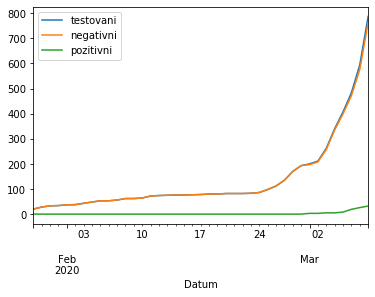

In [10]:
import matplotlib.pyplot as plt
import datetime as dt
df["Datum"] = pd.to_datetime(df['Datum'], dayfirst=True)
df.set_index("Datum")

ax = df.plot(kind='line',x='Datum',y=['testovani','negativni','pozitivni'])

In [11]:
df.iloc[0]

Datum        2020-03-08 00:00:00
testovani                    787
negativni                    761
pozitivni                     32
Name: 0, dtype: object